In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import bokeh
import seaborn as sns
import numpy as np
import scipy

In [3]:
complete_data = pd.read_csv("../ChessAnalysis/games.csv")
complete_data.head(3);

In [4]:
# in this notebook, I want to visualize the advantage of playing as white over ELO rating
# with the goal of determining if the advantage changes over time, and if so, how?
# (note: for both RATED and UNRATED games, separately)

In [5]:
pertinent = complete_data[["rated", "winner", "white_rating", "black_rating"]]
pertinent["rating_avg"] = (pertinent["white_rating"] + pertinent["black_rating"])/2
pertinent.head(5);

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [6]:
rated_games = pertinent[pertinent["rated"] == True].sort_values(by="rating_avg")
unrated_games = pertinent[pertinent["rated"] == False].sort_values(by="rating_avg")

In [7]:
# now, need to find the winrate of white as a function of the ELO rating for both sets

In [44]:
rated_games.shape[0]

16155

In [83]:
lowest = 900
increment = 50
counter = 0
rated_arr = []
upper_bound = lowest+increment
lower_bound = lowest

while lower_bound+increment <= rated_games["rating_avg"].max():
    games = rated_games[(rated_games["rating_avg"] >= lower_bound) & (rated_games["rating_avg"] < upper_bound)]
    white_wins = games[games["winner"] == "white"].shape[0]
    black_wins = games[games["winner"] == "black"].shape[0]
    draws = games[games["winner"] == "draw"].shape[0]
    num_games = games.shape[0]
#     add winrates to array in dict
    white_winrate = (white_wins/num_games)*100
    black_winrate = (black_wins/num_games)*100
    draw_rate = (draws/num_games)*100
    test = [lower_bound, white_wins, black_wins, draws, num_games]
    toAdd = [lower_bound, white_winrate, black_winrate, draw_rate, num_games]
#     print("TEST ARR: ", test)
#     print("TOADD ARR: ", toAdd)
#     print()
    rated_arr.append(toAdd)
#     counter += 1
#     upper_bound = lowest+increment*(counter + 1)
#     lower_bound = lowest+(increment*counter)
    lower_bound += 10
    upper_bound += 10
    
results = pd.DataFrame(rated_arr, columns=["rating_chunk", "white_winrate", "black_winrate", "draw_rate", "num_games"])

In [88]:
# need to access the datasets from the other notebook to add game density curves

%store -r rated_dist
%store -r unrated_dist

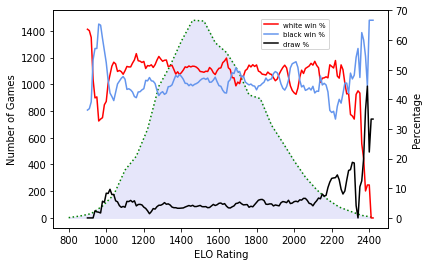

<Figure size 3600x3600 with 0 Axes>

In [134]:
# going to plot all three lines on the same plot to give a better visual understanding of the color advantage

fig, ax1 = plt.subplots()
plt.figure(figsize=(50,50))

ax1.set_xlabel("ELO Rating")

ax1.plot(rated_dist["rating_chunk"], rated_dist["num_games"], color="green", linestyle=":")
ax1.fill_between(rated_dist["rating_chunk"], rated_dist["num_games"], color="lavender")
ax1.set_ylabel("Number of Games")

ax2 = ax1.twinx()
ax2.set_ylabel("Percentage")
ax2.plot(results["rating_chunk"], results["white_winrate"], color="red", label="white win %")
ax2.plot(results["rating_chunk"], results["black_winrate"], color="cornflowerblue", label="black win %")
ax2.plot(results["rating_chunk"], results["draw_rate"], color="black", label="draw %")
ax2.legend(loc=(0.62,0.82), fontsize="x-small")

plt.show()

In [135]:
fig.savefig("color_adv.png")